### 5.Word Embedding / 단어 임베딩

- TF-IDF
- LSA, Latent Semantic Analysis
- Topic Modeling


- distributed representation
    - Dai, Andrew M., Christopher Olah, and Quoc V. Le. "Document embedding with paragraph vectors." arXiv preprint arXiv:1507.07998 (2015).
    
    - word2vec (CBOW -주변 단어의 윈도우 상에서 현재 단어 예측, Skip-gram -중심 단어를 기반으로 주변단어 예측)

In [1]:
from keras.layers.core import Dense, Dropout, SpatialDropout1D
from keras.layers.convolutional import Conv1D
from keras.layers.embeddings import Embedding
from keras.layers.pooling import GlobalMaxPooling1D
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import codecs

Using TensorFlow backend.


In [2]:
np.random.seed(2019)

In [3]:
from keras.datasets import reuters
import numpy as np

In [4]:
# words with frequency rank of 1-1000
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [5]:
X_train.shape

(8982,)

In [6]:
category = np.max(Y_train)+1
category

46

In [7]:
MAX_LEN = 300

In [8]:
from keras.preprocessing import sequence

In [9]:
x_train = sequence.pad_sequences(X_train, maxlen=MAX_LEN)
x_test = sequence.pad_sequences(X_test, maxlen=MAX_LEN)

In [10]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

### GloVe

- count based model (단어, 문백) 쌍을 갖는 큰 행렬을 구성 -> matrix factorization

- R = P * Q ~=~ R'
    - 복원한 행렬 R'과 원래 행렬 R의 차이는 복원 오류를 최소화하기 위해 R'를 R에 가깝게 이동시키고자 P와 Q를 얼마만큼 변경해야 하는 지 알려준다. 이 과정을 SGD가 수렵한다.

In [11]:
vocab_size = 5000
embed_size = MAX_LEN
window_size = 1
BATCH_SIZE = 64
NUM_EPOCHS= 20

In [12]:
import gensim.downloader as api

#https://github.com/RaRe-Technologies/gensim-data
word_vectors = api.load("glove-wiki-gigaword-300")

In [13]:
len(word_vectors.wv.index2word)

/home/grace/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


400000

In [15]:
embedding_weights = np.zeros((vocab_size, embed_size))
for ind in range(vocab_size):
    try:
        embedding_weights[ind, :] = word_vectors.wv[word_vectors.wv.index2word[ind]]
    except KeyError:
        pass

/home/grace/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [16]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_length=MAX_LEN, weights=[embedding_weights], trainable=True))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(category, activation='softmax'))

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 49s 5ms/step - loss: 1.6915 - acc: 0.5992 - val_loss: 1.3262 - val_acc: 0.7021
Epoch 2/20
8982/8982 [==============================] - 55s 6ms/step - loss: 1.0764 - acc: 0.7536 - val_loss: 1.0550 - val_acc: 0.7507
Epoch 3/20
8982/8982 [==============================] - 60s 7ms/step - loss: 0.8078 - acc: 0.8064 - val_loss: 0.9445 - val_acc: 0.7783
Epoch 4/20
8982/8982 [==============================] - 56s 6ms/step - loss: 0.6457 - acc: 0.8392 - val_loss: 0.8835 - val_acc: 0.7850
Epoch 5/20
8982/8982 [==============================] - 54s 6ms/step - loss: 0.5258 - acc: 0.8702 - val_loss: 0.8704 - val_acc: 0.7974
Epoch 6/20
8982/8982 [==============================] - 59s 7ms/step - loss: 0.4314 - acc: 0.8877 - val_loss: 0.8749 - val_acc: 0.7907
Epoch 7/20
8982/8982 [==============================] - 52s 6ms/step - loss: 0.3486 - acc: 0.9089 - val_loss: 0.8838 - val_acc: 0.7814
Epoch 8

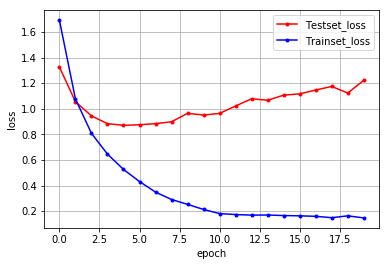

In [19]:
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']

# training set
y_loss = history.history['loss']

plt.plot(np.arange(len(y_loss)), y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(np.arange(len(y_loss)), y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

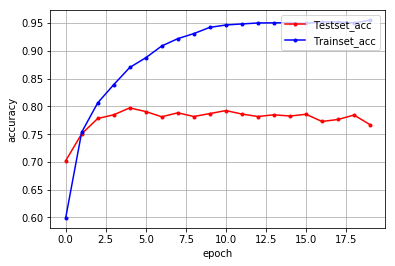

In [20]:
import matplotlib.pyplot as plt

y_vacc = history.history['val_acc']

# training set
y_acc = history.history['acc']

plt.plot(np.arange(len(y_acc)), y_vacc, marker='.', c='red', label='Testset_acc')
plt.plot(np.arange(len(y_acc)), y_acc, marker='.', c='blue', label='Trainset_acc')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()